In [18]:
import pandas as pd
import numpy
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
df = pd.read_csv("input/en_train.csv")

In [20]:
print(df.shape)

(9918441, 5)


In [21]:
df_classes = df.groupby('class').count()
df_class_list = list(set(c for c in df['class']))
print(df_class_list)
x =[val for val in  df_classes['before']]
print (x)

['ORDINAL', 'DECIMAL', 'TELEPHONE', 'FRACTION', 'CARDINAL', 'ELECTRONIC', 'PLAIN', 'TIME', 'VERBATIM', 'DIGIT', 'DATE', 'ADDRESS', 'MONEY', 'LETTERS', 'PUNCT', 'MEASURE']
[522, 133744, 258348, 9821, 5442, 5162, 1196, 152790, 14783, 6128, 12703, 7353647, 1880507, 4024, 1465, 78108]


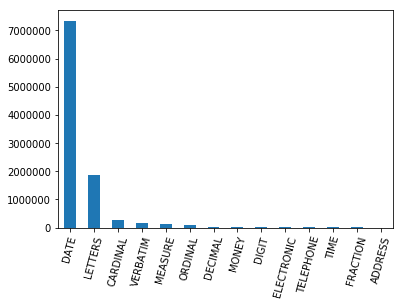

In [22]:
df_classes_counts = df['class'].value_counts()
df_classes_counts.plot(kind='bar', rot=75)

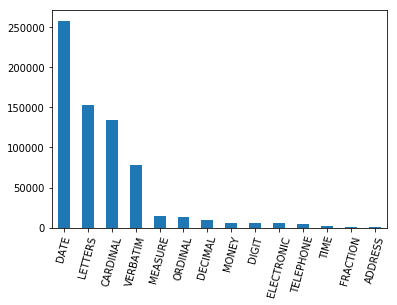

In [23]:
df1= df[df['class']!='PLAIN']
df1 = df1[df1['class']!='PUNCT']
df_classes_counts = df1['class'].value_counts()
df_classes_counts.plot(kind='bar', rot=75)

In [24]:
train_data = df
group_class = train_data.groupby('class', as_index=False).count()
change_data = train_data.loc[train_data["before"] != train_data["after"]]
group_class_change = change_data.groupby('class', as_index=False).count()

In [25]:
percent_change = dict.fromkeys(["class", "percentage"])
percent_change["class"] = []; percent_change["percentage"] = []

for i in group_class_change["class"]:
    val_1 = list(group_class_change.loc[group_class_change["class"] == i]["before"])[0]
    val_2 = list(group_class.loc[group_class["class"] == i]["before"])[0]
    percentage = 100 * val_1/val_2
    percent_change["class"].append(i)
    percent_change["percentage"].append(percentage)
percent_change["class"].append("PUNCT")
percent_change["percentage"].append(0.00000)

percent_change = pd.DataFrame(percent_change)
print(percent_change)

         class  percentage
0      ADDRESS  100.000000
1     CARDINAL  100.000000
2         DATE  100.000000
3      DECIMAL  100.000000
4        DIGIT  100.000000
5   ELECTRONIC   96.164277
6     FRACTION  100.000000
7      LETTERS   94.485241
8      MEASURE   99.851180
9        MONEY   99.951044
10     ORDINAL  100.000000
11       PLAIN    0.495972
12   TELEPHONE  100.000000
13        TIME  100.000000
14    VERBATIM   33.078558
15       PUNCT    0.000000


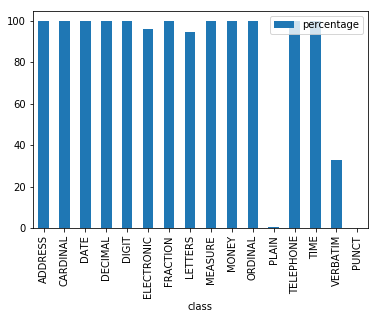

In [26]:
percent_change.plot(kind="bar", x="class", y="percentage")